<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [3]:
## Write your code here
print(df.info())
print(df.head())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Con

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



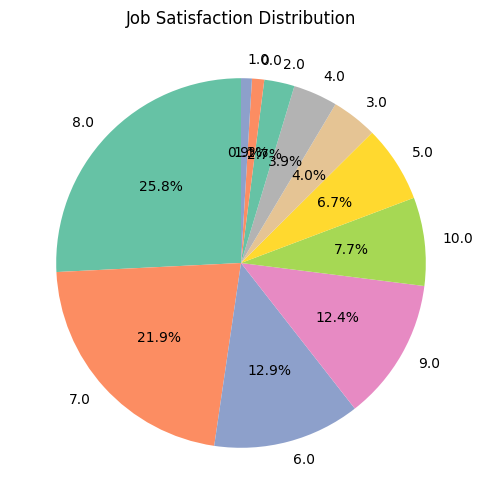

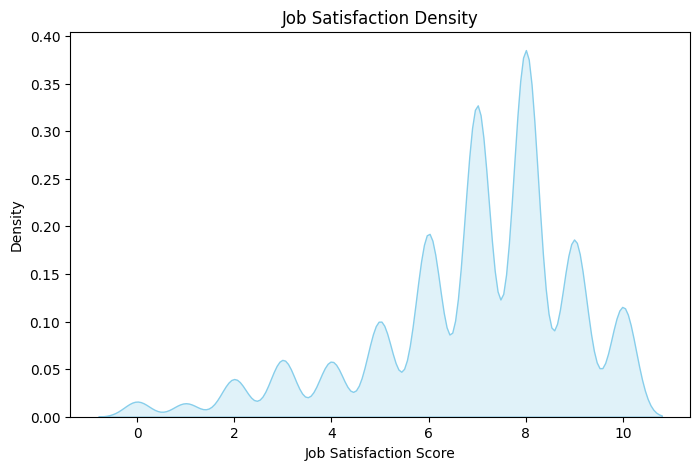

In [4]:
## Write your code here
import seaborn as sns
import matplotlib.pyplot as plt

# Pie chart of JobSat distribution
job_sat_counts = df['JobSat'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(job_sat_counts, labels=job_sat_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title("Job Satisfaction Distribution")
plt.show()

# KDE plot (if JobSat is numeric)
if pd.api.types.is_numeric_dtype(df['JobSat']):
    plt.figure(figsize=(8,5))
    sns.kdeplot(df['JobSat'], fill=True, color="skyblue")
    plt.title("Job Satisfaction Density")
    plt.xlabel("Job Satisfaction Score")
    plt.show()

### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [5]:
## Write your code here
from matplotlib_venn import venn2

# Split multiple languages into lists
df_have = df.dropna(subset=['LanguageHaveWorkedWith']).copy()
df_have = df_have.assign(Language=df_have['LanguageHaveWorkedWith'].str.split(';')).explode('Language')

df_want = df.dropna(subset=['LanguageWantToWorkWith']).copy()
df_want = df_want.assign(Language=df_want['LanguageWantToWorkWith'].str.split(';')).explode('Language')

# Sets for Venn diagram
have_set = set(df_have['Language'].unique())
want_set = set(df_want['Language'].unique())

plt.figure(figsize=(8,6))
venn2([have_set, want_set], set_labels=('Have Worked With', 'Want To Work With'))
plt.title("Overlap of Programming Languages")
plt.show()

# Grouped bar chart for top languages
top_langs = pd.concat([
    df_have['Language'].value_counts().rename("Have"),
    df_want['Language'].value_counts().rename("Want")
], axis=1).fillna(0).sort_values("Have", ascending=False).head(10)

top_langs.plot(kind="bar", figsize=(12,6))
plt.title("Top Programming Languages: Have vs Want")
plt.ylabel("Count")
plt.show()

ModuleNotFoundError: No module named 'matplotlib_venn'

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


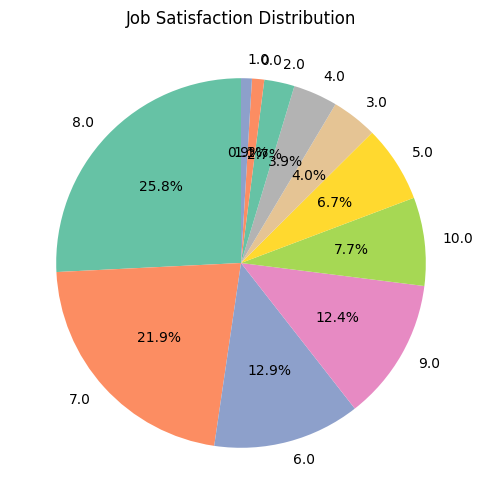

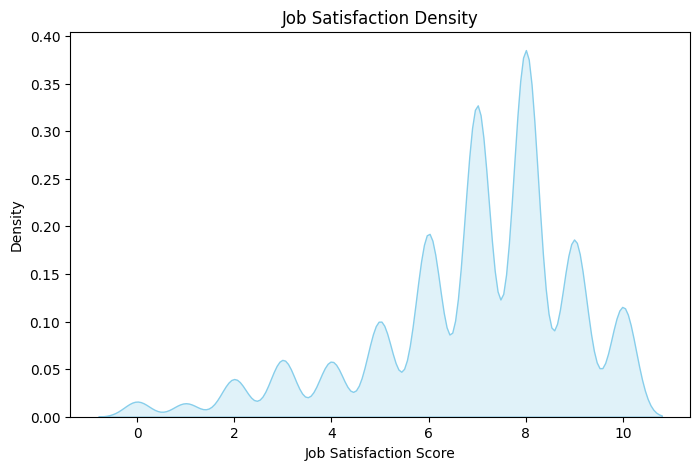

In [8]:
## Write your code here
import seaborn as sns
import matplotlib.pyplot as plt

# Pie chart of JobSat distribution
job_sat_counts = df['JobSat'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(job_sat_counts, labels=job_sat_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title("Job Satisfaction Distribution")
plt.show()

# KDE plot (if JobSat is numeric)
if pd.api.types.is_numeric_dtype(df['JobSat']):
    plt.figure(figsize=(8,5))
    sns.kdeplot(df['JobSat'], fill=True, color="skyblue")
    plt.title("Job Satisfaction Density")
    plt.xlabel("Job Satisfaction Score")
    plt.show()

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


In [7]:
## Write your code here
from matplotlib_venn import venn2

# Split multiple languages into lists
df_have = df.dropna(subset=['LanguageHaveWorkedWith']).copy()
df_have = df_have.assign(Language=df_have['LanguageHaveWorkedWith'].str.split(';')).explode('Language')

df_want = df.dropna(subset=['LanguageWantToWorkWith']).copy()
df_want = df_want.assign(Language=df_want['LanguageWantToWorkWith'].str.split(';')).explode('Language')

# Sets for Venn diagram
have_set = set(df_have['Language'].unique())
want_set = set(df_want['Language'].unique())

plt.figure(figsize=(8,6))
venn2([have_set, want_set], set_labels=('Have Worked With', 'Want To Work With'))
plt.title("Overlap of Programming Languages")
plt.show()

# Grouped bar chart for top languages
top_langs = pd.concat([
    df_have['Language'].value_counts().rename("Have"),
    df_want['Language'].value_counts().rename("Want")
], axis=1).fillna(0).sort_values("Have", ascending=False).head(10)

top_langs.plot(kind="bar", figsize=(12,6))
plt.title("Top Programming Languages: Have vs Want")
plt.ylabel("Count")
plt.show()

ModuleNotFoundError: No module named 'matplotlib_venn'

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


In [9]:
## Write your code here
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Region', hue='RemoteWork', palette="Set2")
plt.title("Remote Work Distribution by Region")
plt.xticks(rotation=45)
plt.show()

# Heatmap of RemoteWork by Region
remote_region_ct = pd.crosstab(df['Region'], df['RemoteWork'])
plt.figure(figsize=(12,6))
sns.heatmap(remote_region_ct, annot=True, fmt='d', cmap="Blues")
plt.title("Remote Work Preferences by Region")
plt.show()

ValueError: Could not interpret value `Region` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


Pearson correlation:
                 JobSat  YearsCodePro
JobSat        1.000000      0.103365
YearsCodePro  0.103365      1.000000
Spearman correlation:
                 JobSat  YearsCodePro
JobSat        1.000000      0.120685
YearsCodePro  0.120685      1.000000


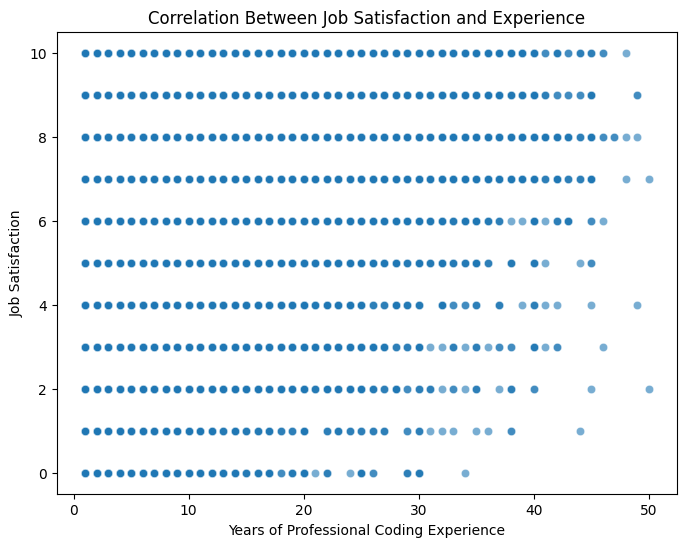

In [10]:
## Write your code here
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Calculate correlation
pearson_corr = df[['JobSat','YearsCodePro']].corr(method='pearson')
spearman_corr = df[['JobSat','YearsCodePro']].corr(method='spearman')

print("Pearson correlation:\n", pearson_corr)
print("Spearman correlation:\n", spearman_corr)

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='YearsCodePro', y='JobSat', alpha=0.6)
plt.title("Correlation Between Job Satisfaction and Experience")
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Job Satisfaction")
plt.show()

### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                1059   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      16806   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                   11011   
Primary/elementary school                                           160   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     2073   
Secondary school (e.g. American high school, Ge...                 1460   
Some college/university study without earning a...                 3579   
Something else                                                      377   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
Associate degree (A.A., A.S., etc.)                        

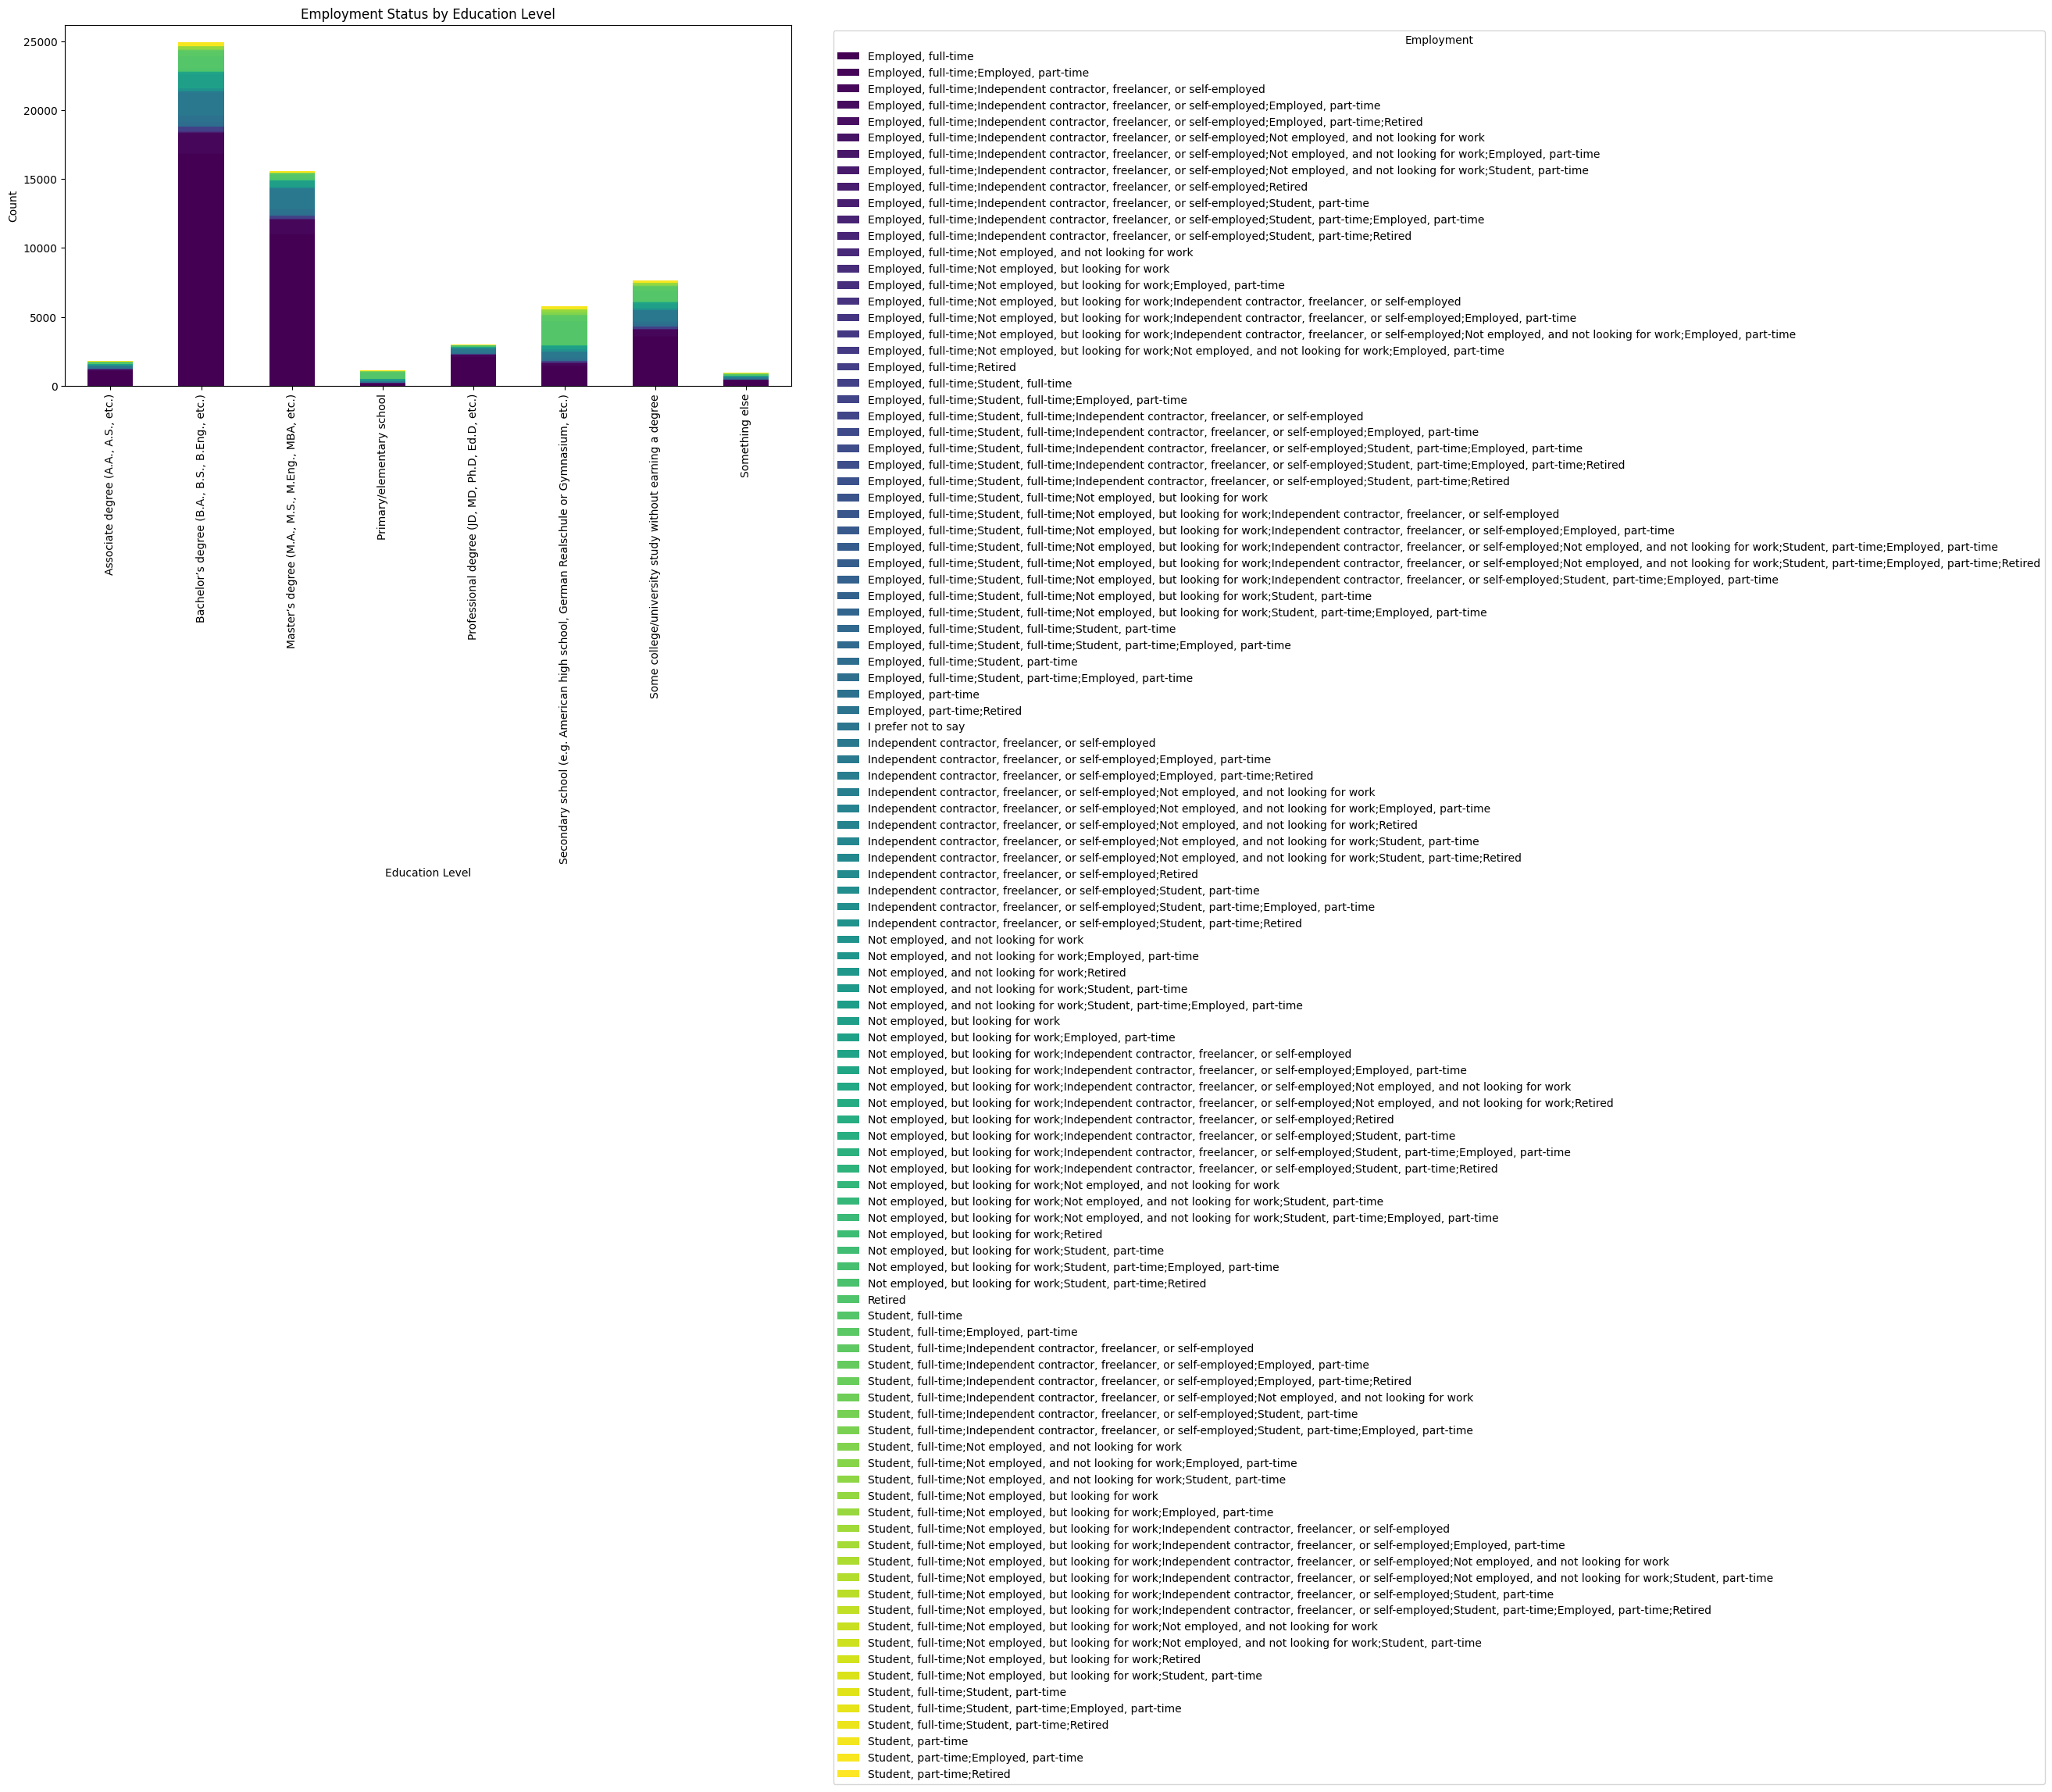

In [11]:
## Write your code here
edu_emp_ct = pd.crosstab(df['EdLevel'], df['Employment'])
print(edu_emp_ct)

# Stacked bar plot
edu_emp_ct.plot(kind='bar', stacked=True, figsize=(12,6), colormap="viridis")
plt.title("Employment Status by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.legend(title="Employment", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [12]:
## Write your code here
df.to_csv("cleaned_dataset.csv", index=False)

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
